# 範例

實作本篇提到的三大概念

- 翻轉：實作上下翻轉
- 縮放：實作鄰近差值
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img_path = '../1st-DL-CVMarathon/data/lena.png'
img = cv2.imread(img_path)

## 上下翻轉圖片

In [2]:
# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 組合 + 顯示圖片
# hflip = np.vstack((img, img_vflip))
# while True:
#     cv2.imshow('flip image', hflip)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

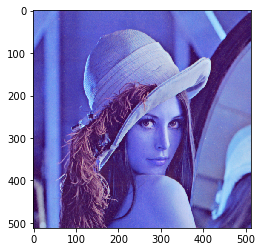

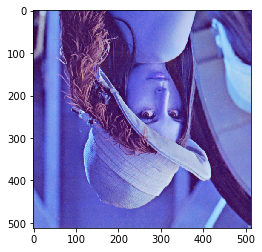

In [3]:
hflip = [img, img_vflip]
for i in range(len(hflip)):
    plt.imshow(hflip[i])
    plt.show()

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

In [4]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
orig_img = cv2.resize(img, img_area_scale.shape[:2])
img_zoom = np.hstack((orig_img, img_area_scale))
# while True:
#     cv2.imshow('zoom image', img_zoom)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

INTER_NEAREST zoom cost 0.0031900405883789062


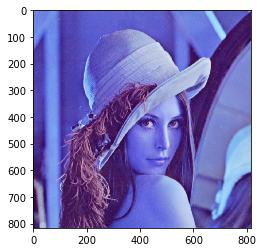

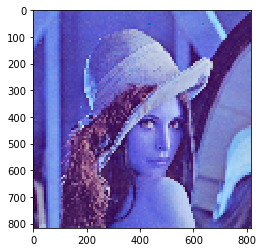

In [5]:
img_zoom = [orig_img, img_area_scale]
for i in range(len(img_zoom)):
    plt.imshow(img_zoom[i])
    plt.show()

## 平移幾何轉換

In [6]:
# 設定 translation transformation matrix
# x 平移 100 pixel; y 平移 50 pixel
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
# img_shift = np.hstack((img, shift_img))
# while True:
#     cv2.imshow('shift image', img_shift)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

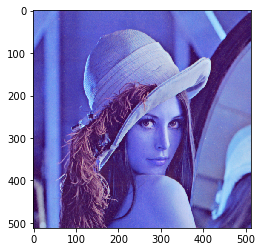

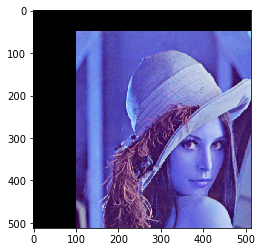

In [8]:
img_shift = [img, shift_img]
for i in range(len(img_shift)):
    plt.imshow(img_shift[i])
    plt.show()

In [9]:
print(M)

[[  1.   0. 100.]
 [  0.   1.  50.]]
